<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Integrate-the-mixed-layer-equations-(notes-eqn.-11-13)" data-toc-modified-id="Integrate-the-mixed-layer-equations-(notes-eqn.-11-13)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Integrate the mixed layer equations (notes eqn. 11-13)</a></span></li><li><span><a href="#does-the-height-grow-as-$\sqrt{time}?$" data-toc-modified-id="does-the-height-grow-as-$\sqrt{time}?$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>does the height grow as $\sqrt{time}?$</a></span></li></ul></div>

# Integrate the mixed layer equations (notes eqn. 11-13)

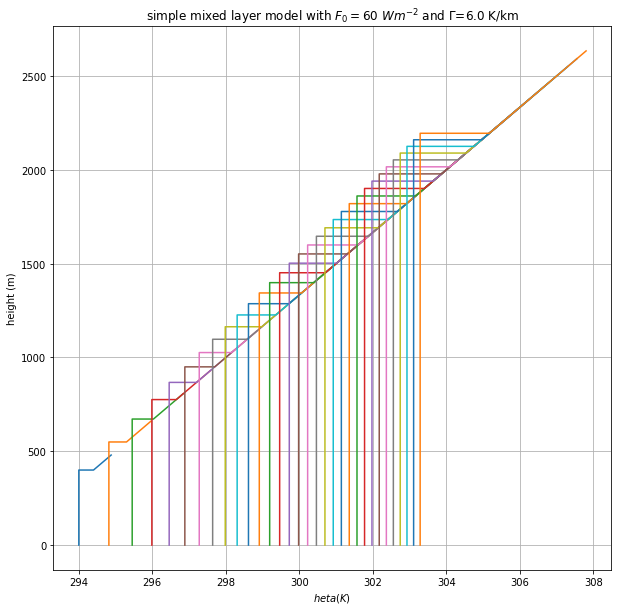

In [12]:
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt
import pandas as pd


def dmixed_vars(the_vars,tstep,F0,wh,gamma):
    """
      derivatives for simple mixed layer (see mixed layer notes eqn. 11-13)
    """
    k=0.2
    rho=1.
    cp=1004.
    derivs=np.empty_like(the_vars)
    derivs[0]=(1 + k)*F0/(the_vars[1]*cp*rho)
    derivs[1] = k*F0/(rho*cp*the_vars[2]) + wh
    derivs[2] = (derivs[1] - wh)*gamma - derivs[0]
    return derivs

def make_prof(df_out,gamma):
    #
    #  construct a vertical (theta, height) profile with the correct Delta theta jump
    #  using four points
    #
    profile=[(df_out['theta'],0),
             (df_out['theta'],df_out['h']),
             (df_out['theta'] + df_out['deltheta'],df_out['h']),
             (df_out['theta'] + df_out['deltheta'] + gamma*0.2*df_out['h'],1.2*df_out['h'])]
    xvals=[item[0] for item in profile]
    yvals=[item[1] for item in profile]
    return xvals,yvals

dtout=30.  #minutes
tf=48   #hours
dtout=dtout*60.
tf=tf*3600.
tspan = np.arange(0.,tf,dtout)
gamma=6.e-3  #K/m
theta_sst = 290.
intercept = 292.
h=400.
theta=294.
theta_ft = intercept + gamma*h
del_theta=theta_ft - theta
vars_init=[theta,h,del_theta]  #theta (K), height (m), del theta (K) to start
gamma=6.e-3  #K/m
F0 = 60 #W/m^2
wh= 0.  #m/s
output=integrate.odeint(dmixed_vars, vars_init, tspan,(F0,wh,gamma))
result=pd.DataFrame.from_records(output,columns=['theta','h','deltheta'])
result['time']=tspan/24./3600.
out=result.to_dict(orient='records')

fig,ax = plt.subplots(1,1,figsize=(10,10))
for count,row in enumerate(out):
    if np.mod(count,3) == 0:
        thetavals,heightvals=make_prof(row,gamma)
        ax.plot(thetavals,heightvals)
#
# note that the title tuple concatenates the two lines together if
# the aren't separated by a comma

out=ax.set(xlabel='$\theta (K)$',ylabel='height (m)',
          title=('simple mixed layer model with '
                 '$F_0 = {}\ Wm^{{-2}}$ and $\Gamma$={} K/km').format(F0,gamma*1.e3))
ax.grid(True,which='both')


# does the height grow as $\sqrt{time}?$

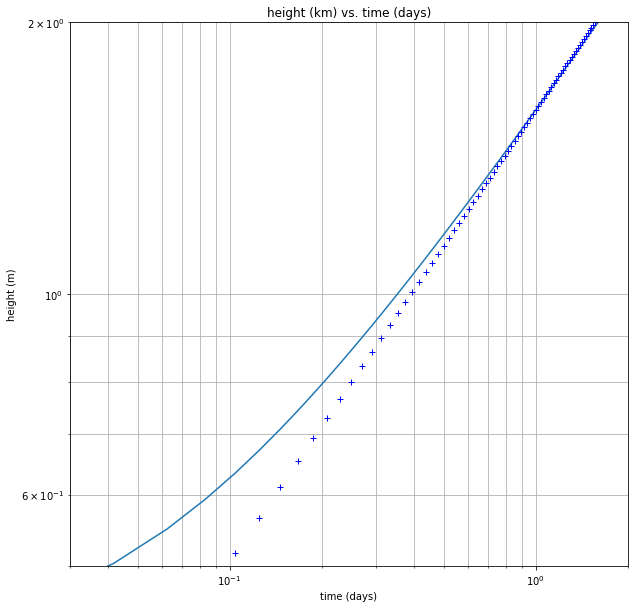

In [9]:
np.seterr(divide='ignore')
m2km=1.e-3
fig, ax=plt.subplots(1,1,figsize=(10,10))
ax.loglog(result['time'],result['h']*m2km)
ax.set(ylim=[0.5,2.],xlim=[3.e-2,2],
      title='height (km) vs. time (days)',
      xlabel='time (days)',ylabel='height (m)')
midpoint=np.int(len(result['time'])/2.)
x0,y0=result['time'].values[midpoint],result['h'].values[midpoint]*m2km
intercept=np.log10(y0) - 0.5*np.log10(x0)
log10y=intercept + 0.5*np.log10(result['time'])
yplot=10**log10y
out=ax.loglog(result['time'],yplot,'b+')
ax.grid(True,which='both')

In [11]:
!pwd

/Users/phil/repos/atsc500/notebooks
